<a href="https://colab.research.google.com/github/yuzzaf/Course-Machine-Learning/blob/main/MIDTERM/UTS_ML_Regression_Linear_Boston_Housing_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**UTS Machine Learning_Regression Linear_Boston Housing Dataset**


---


Nama: Muhammad Yuzzaf Ibrahim Azzumarafi

NIM: 1103200082



---
Dataset: [Boston Housing Dataset](https://www.kaggle.com/datasets/altavish/boston-housing-dataset)

Model: Regression Linear


**Collect Boston Housing Dataset from Google Drive**

`Prompt: berikan saya code untuk membaca folder di google drive '/Dataset/HousingData.csv' and put it in a pandas dataframe called "df" in google colab`



In [2]:
# Import necessary libraries
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
# Define the path to the CSV file in your Google Drive
file_path = '/content/drive/MyDrive/Dataset/HousingData.csv'

In [4]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv(file_path)

# Display the DataFrame
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


Output:

df.head() adalah perintah yang digunakan untuk menampilkan beberapa baris pertama dari suatu DataFrame yang disimpan dalam variabel dengan nama df. DataFrame adalah struktur data tabular yang sangat umum digunakan dalam analisis data menggunakan pustaka pandas di Python.

Secara khusus, head() digunakan untuk mengakses sejumlah baris pertama dari DataFrame tersebut. Secara default, jika Anda tidak memberikan argumen ke head(), akan ditampilkan lima baris pertama dari DataFrame.

##**EDA**

EDA singkatan dari Exploratory Data Analysis, yang dalam Bahasa Indonesia dapat diterjemahkan sebagai Analisis Data Eksploratif. EDA adalah suatu pendekatan dalam analisis data yang bertujuan untuk menyelidiki dan memahami struktur, pola, serta karakteristik utama dari dataset secara visual dan deskriptif.

Tujuan utama dari EDA adalah untuk mengidentifikasi pola menarik, hubungan, anomali, dan tren dalam data sebelum melibatkan analisis statistik inferensial atau membangun model prediktif.

In [5]:
#menampilkan info dataframe dari dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Output:


1.   Memiliki 506 Rows dengan 14 Columns
2.   semua berupa data numerical berupa float(12) dan integer(2)





In [6]:
#menampilkan statistik dari dataset yang digunakan
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


menghasilkan ringkasan statistik deskriptif untuk kolom-kolom numerik dalam DataFrame. Output yang dihasilkan mencakup beberapa statistik dasar yang memberikan gambaran tentang distribusi nilai-nilai dalam setiap kolom numerik. Berikut adalah tampilan umum dari output df.describe():

*   Mean: Rata-rata aritmatika dari nilai dalam kolom.
*   Std: Standar deviasi, mengukur seberapa tersebar nilai-nilai dari mean.

*  Min: Nilai minimum dalam kolom.
*  25% (Q1): Kuartil pertama, nilai yang membagi 25% data terendah.

*   50% (Q2): Kuartil kedua atau median, nilai yang membagi data menjadi dua bagian setara.
*   75% (Q3): Kuartil ketiga, nilai yang membagi 75% data terendah.


*   Max: Nilai maksimum dalam kolom.







In [18]:
#checking untuk null value pada setiap kolom
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Output:

pada bagian ini akan melakukan checking nilai null terhadap dataset yang digunakan. hasil menunjukan bahwa tidak ada nilai null di dalam dataset yang akan digunakan.

In [7]:
#menghapus null pada setiap kolom
df.dropna(inplace=True)

Prompt ini digunakan untuk menghapus nilai null, jika tidak terdapat nilai null prompt ini bisa di skip.

In [8]:
# Check again for missing values in each column
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

`Prompt: buatkan code boxplot yang terdiri dari dataframe : 'CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV' `

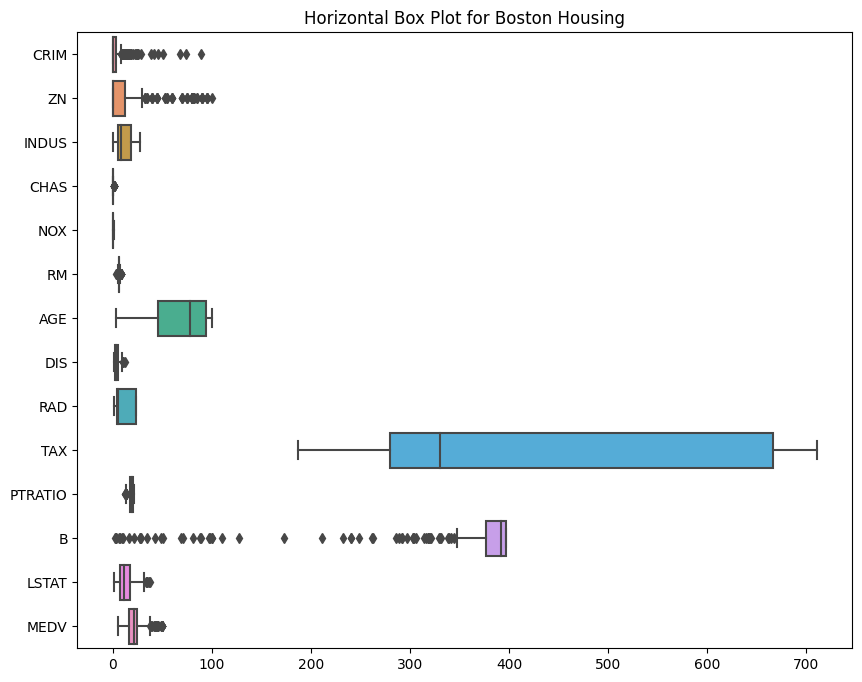

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Kolom-kolom yang ingin diplot
columns_to_plot = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT','MEDV']

# Membuat horizontal boxplot dengan Seaborn
plt.figure(figsize=(10, 8))
sns.boxplot(data=df[columns_to_plot], orient='h')
plt.title('Horizontal Box Plot for Boston Housing')
plt.show()

Output:

 boxplot adalah salah satu jenis grafik yang digunakan dalam statistika deskriptif untuk menampilkan distribusi data dan menggambarkan sejumlah karakteristik statistik penting. Boxplot, atau juga dikenal sebagai diagram kotak-tambang, memberikan gambaran visual tentang distribusi data melalui beberapa statistik, seperti kuartil, rentang interkuartil (IQR), nilai minimum, nilai maksimum, dan potensi titik-titik ekstrem (outliers).

`Prompt: give me a code to remove the outliers from features with box plot make it horizontal`

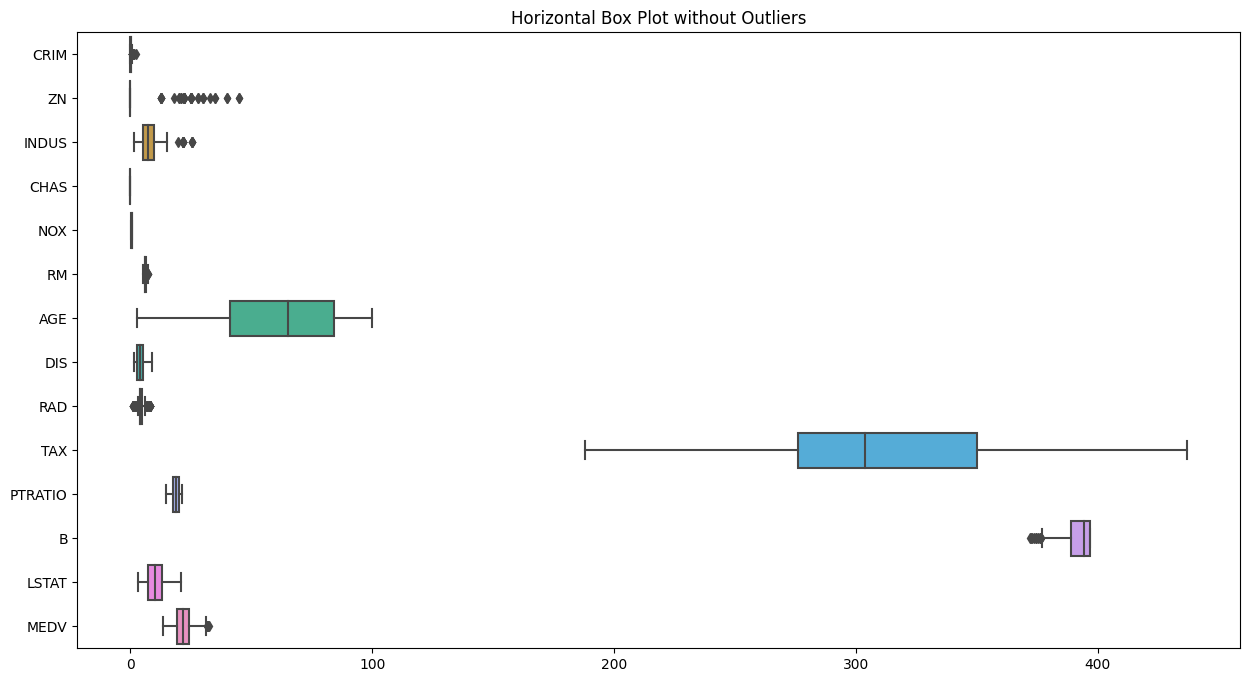

In [10]:
# Fungsi untuk menghapus outliers berdasarkan IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Hapus outliers untuk setiap kolom
for column in columns_to_plot:
    df = remove_outliers(df, column)

# Membuat horizontal box plot tanpa outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[columns_to_plot], orient='h')
plt.title('Horizontal Box Plot without Outliers')
plt.show()

Output:

outliers adalah nilai-nilai yang berada jauh dari kebanyakan nilai dalam dataset dan dapat memiliki dampak signifikan pada hasil analisis statistik. Outliers dapat mempengaruhi distribusi data dan menghasilkan estimasi yang bias.

##**Data Visualization**
Data visualization, atau visualisasi data, adalah proses menggambarkan data secara grafis untuk membantu pemahaman dan analisis. Dalam konteks ini, informasi atau data yang diberikan direpresentasikan secara visual menggunakan elemen-elemen seperti grafik, diagram, dan peta. Tujuan utama dari visualisasi data adalah untuk menyajikan data dengan cara yang mudah dipahami, memudahkan identifikasi pola, tren, dan hubungan dalam data.

`Prompt: buatkan data visualizationsnya dengan dataframe yang sudah disediakan`

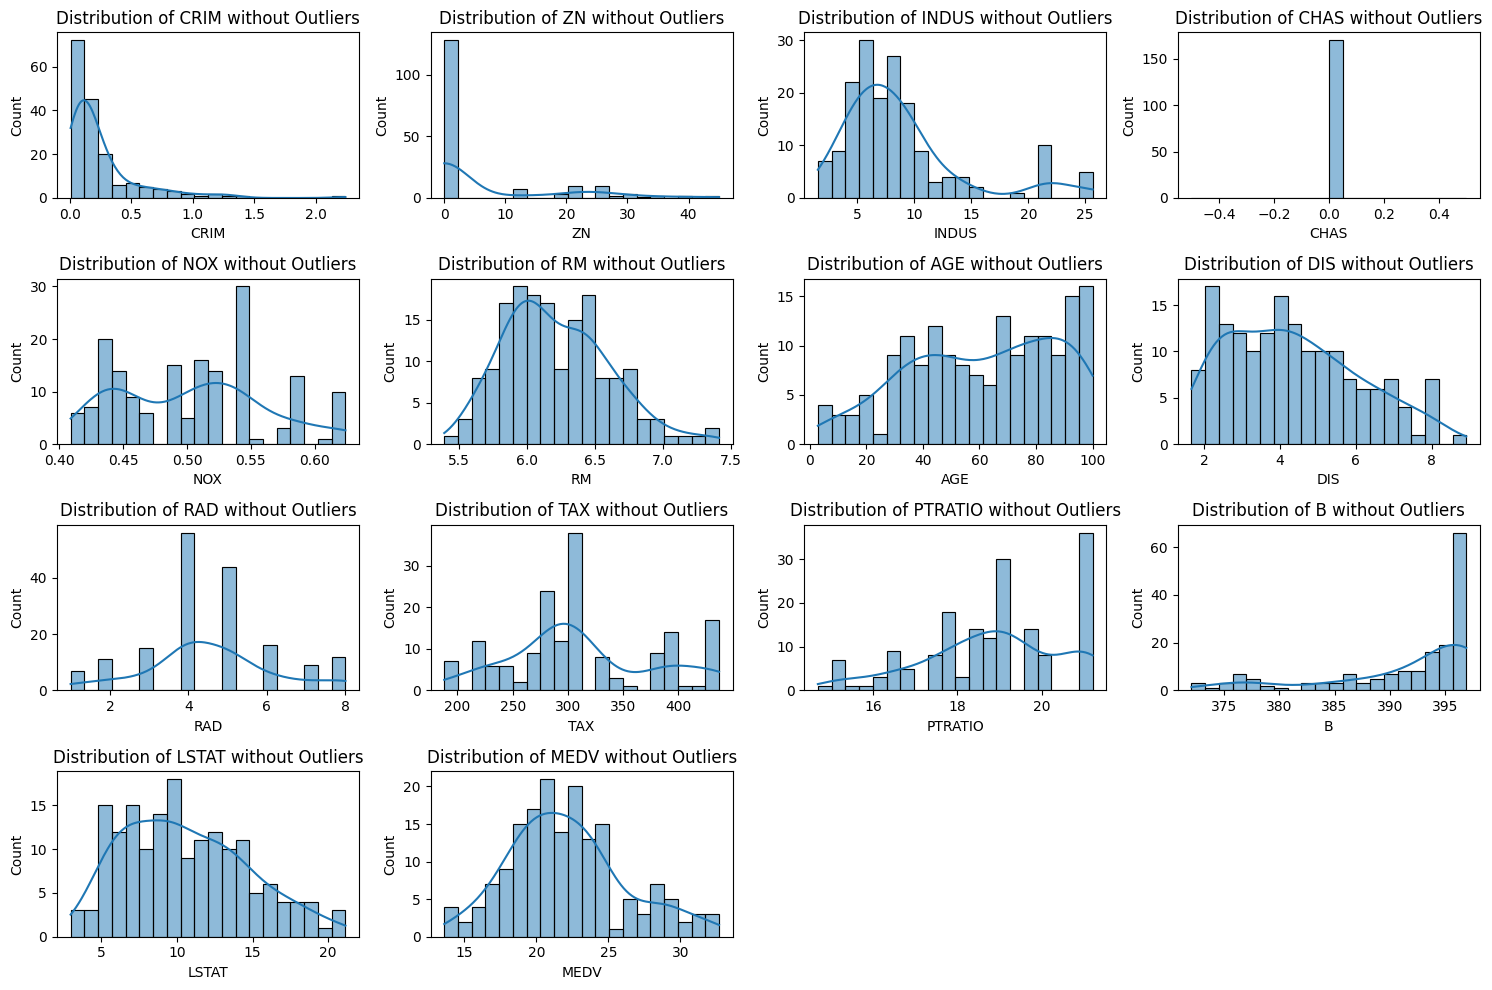

In [11]:
# Visualisasi distribusi setelah menghapus outliers
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(4, 4, i)
    sns.histplot(df[column], bins=20, kde=True)
    plt.title(f'Distribution of {column} without Outliers')

plt.tight_layout()
plt.show()

Output:

disini hasil yang ditampilkan adalah berupa visalisasi datasetnya, hal ini membuat kita lebih memahami struktur, pola, dan karakteristik dari data dengan cara yang sulit dicapai melalui analisis langsung atau deskripsi statistik.

`Prompt: buatkan pairplot visualisasinya dengan dataframe yang sudah disediakan`

<Figure size 1500x1000 with 0 Axes>

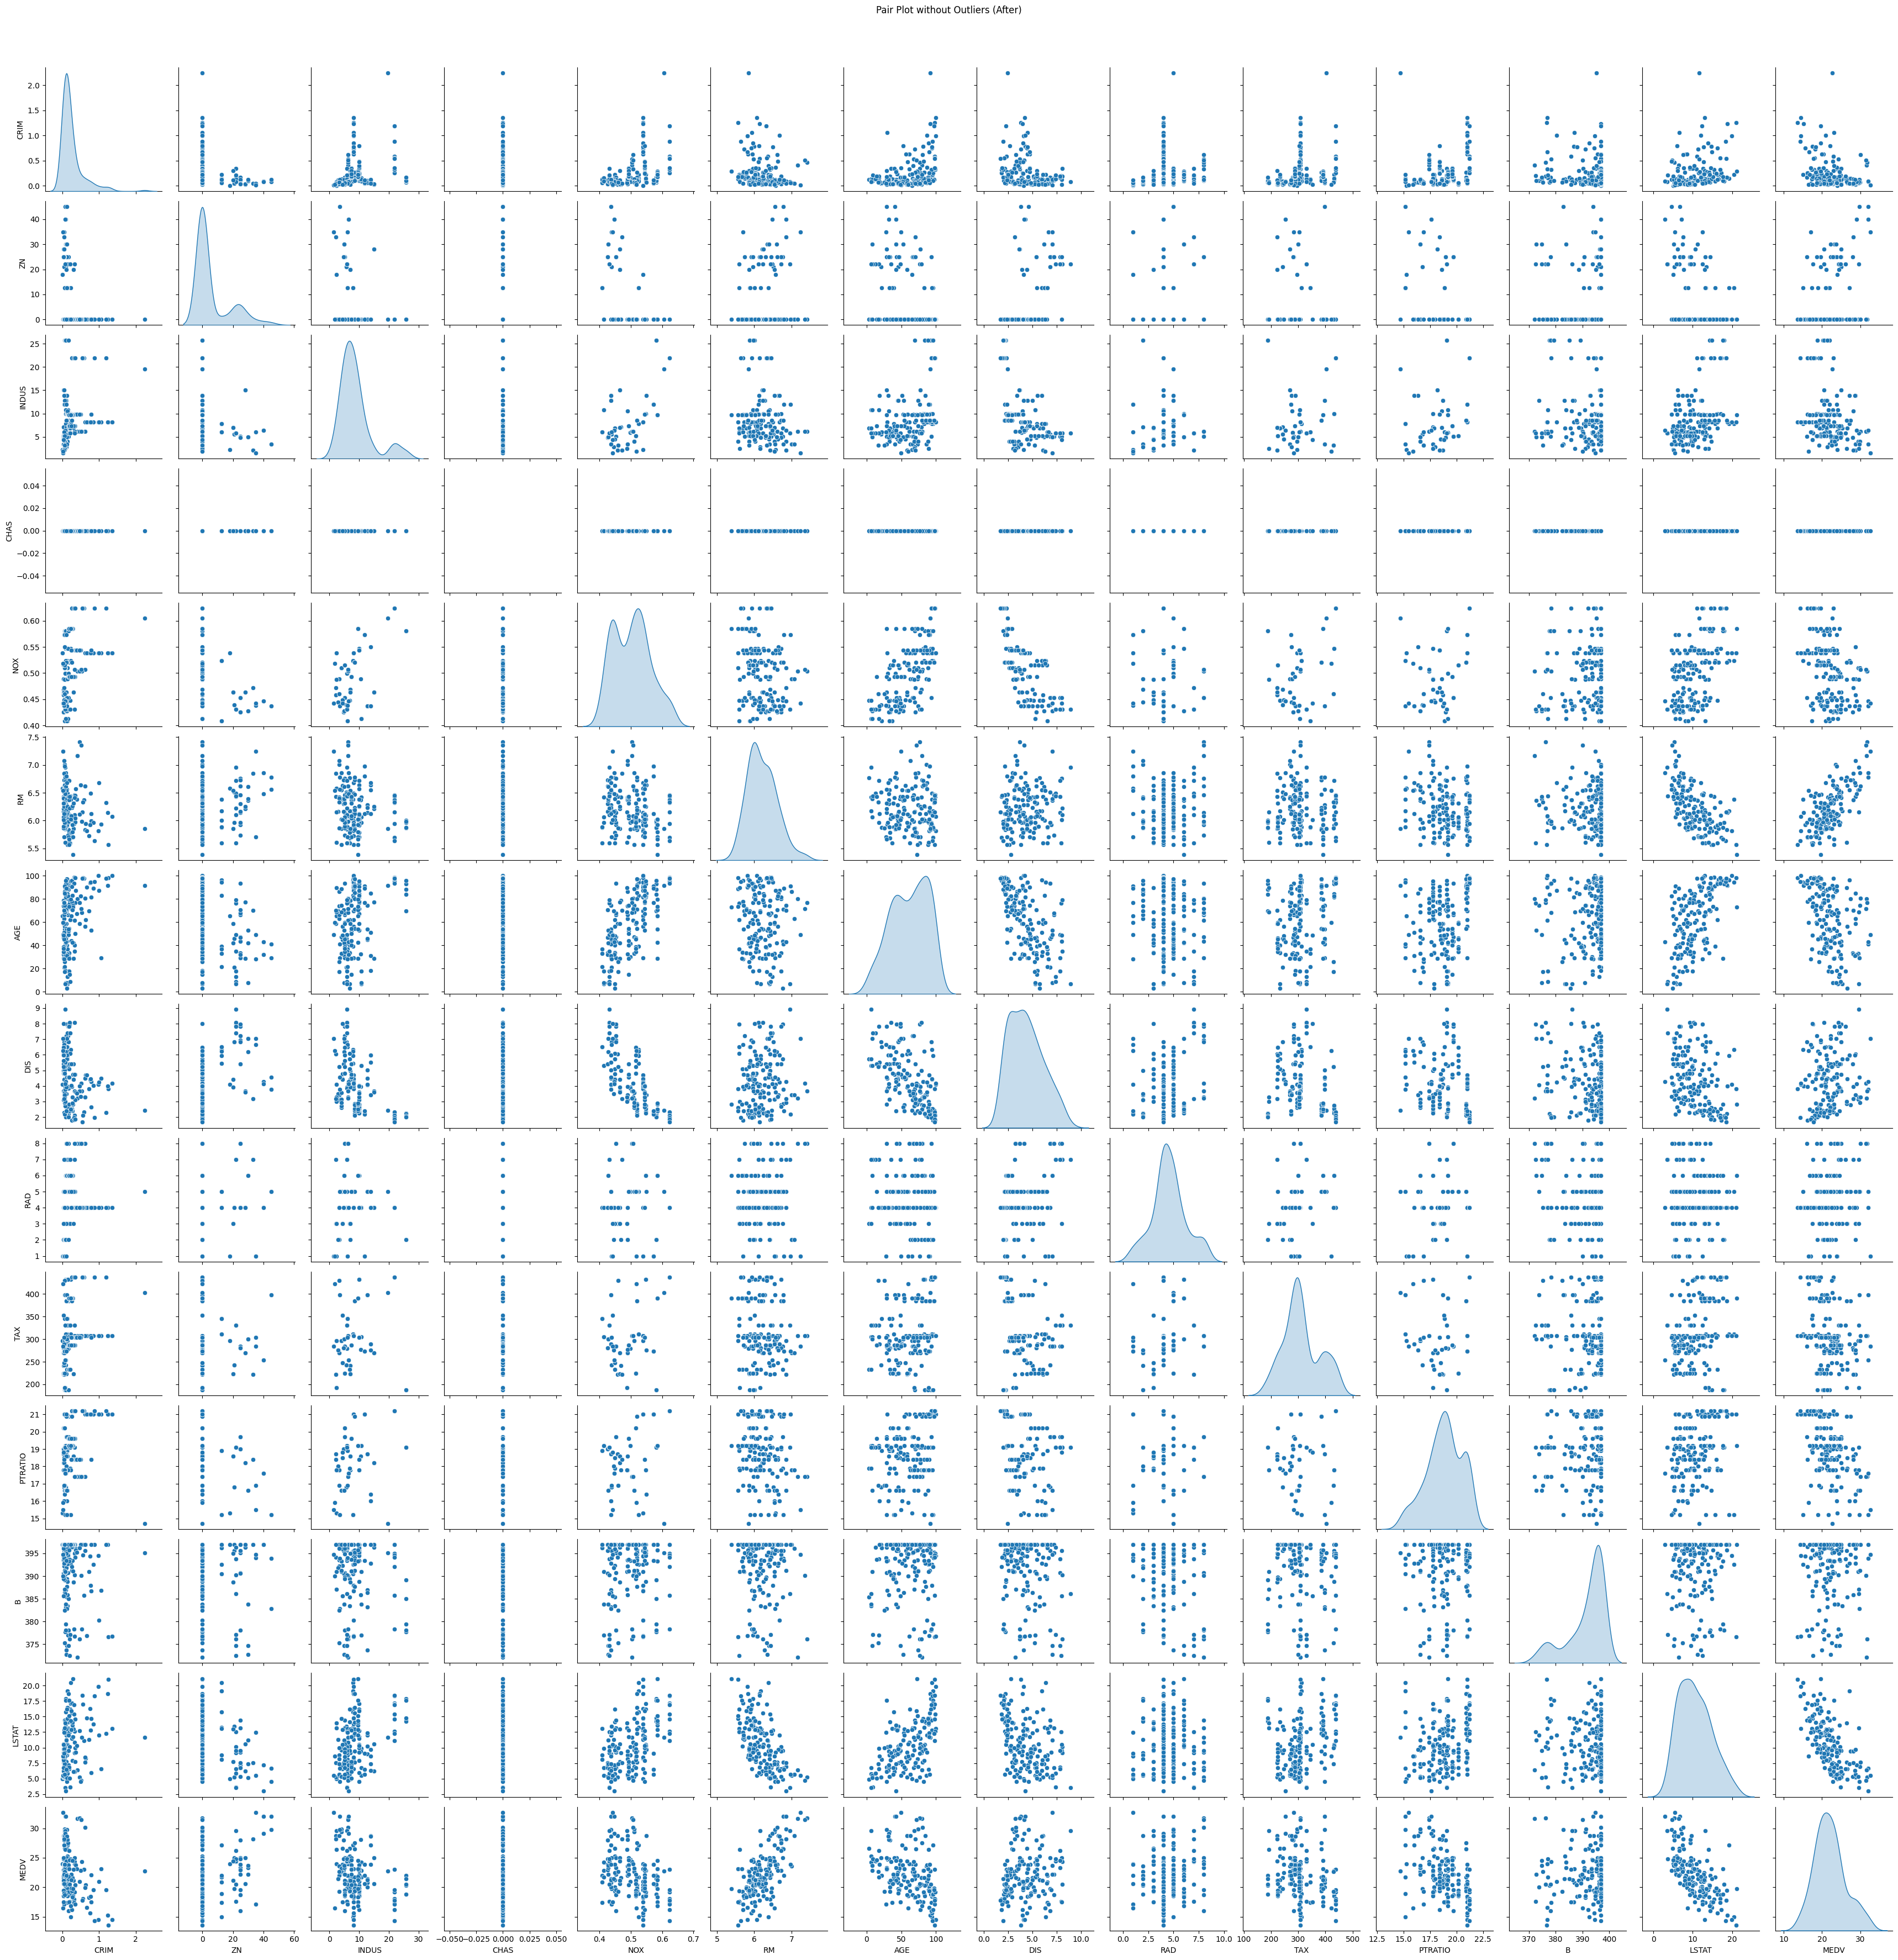

In [12]:
# Membuat pair plot dengan Seaborn tanpa outliers
plt.figure(figsize=(15, 10))
sns.pairplot(df[columns_to_plot], diag_kind='kde')
plt.suptitle('Pair Plot without Outliers (After)', y=1.02)
plt.show()

Output:

 digunakan untuk membuat matriks scatter plot atau kombinasi dari scatter plot dan histogram untuk setiap pasangan variabel numerik dalam sebuah dataset. Fungsi ini membantu Anda untuk dengan cepat memvisualisasikan hubungan dan distribusi antar variabel-variabel tersebut.

`Prompt: buatkan heatmap visualisasinya dengan dataframe yang sudah disediakan`

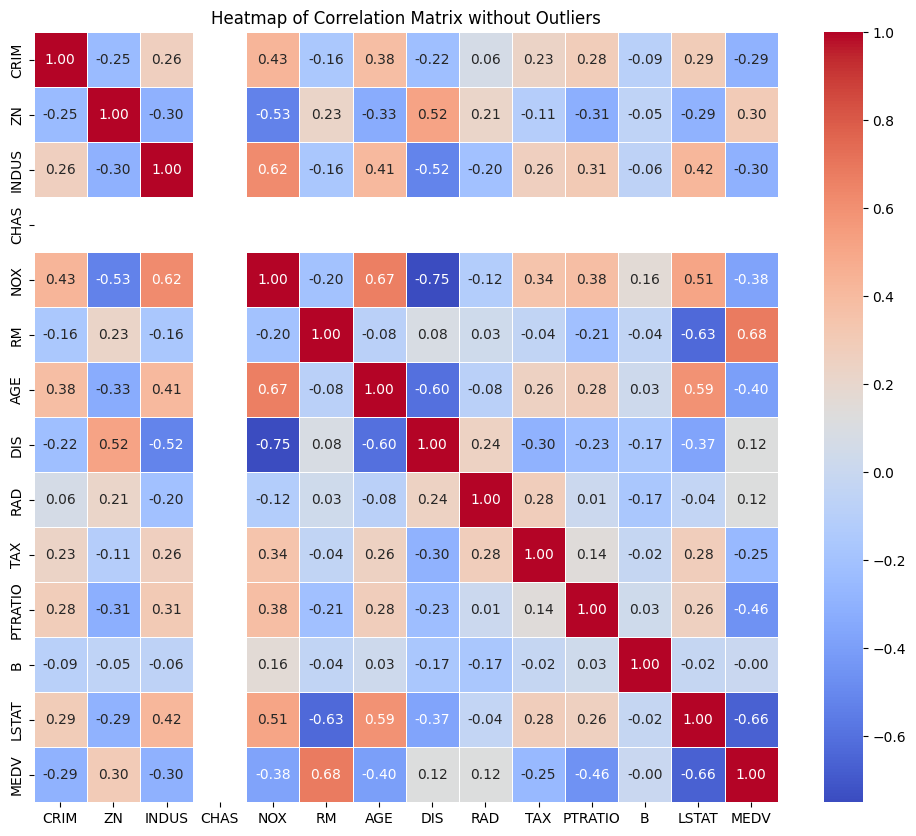

In [13]:
# Menghitung matriks korelasi setelah menghapus outliers
correlation_matrix = df[columns_to_plot].corr()

# Membuat heatmap visualisasi korelasi
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap of Correlation Matrix without Outliers')
plt.show()

Output:

 representasi visual dari data dalam bentuk matriks, di mana intensitas warna di setiap sel mewakili nilai dari suatu variabel. Heatmap berguna untuk memvisualisasikan hubungan dan pola dalam data matriks.


*    Visualisasi Korelasi: Heatmap sering digunakan untuk memvisualisasikan matriks korelasi antar variabel. Warna yang lebih intens menunjukkan korelasi yang lebih kuat.
*   Pemetaan Nilai: Heatmap dapat digunakan untuk memetakan nilai dalam matriks dengan warna, membuatnya mudah untuk melihat pola atau cluster dalam data.

*   Matriks Keterkaitan: Heatmap dapat digunakan untuk memvisualisasikan matriks keterkaitan antar elemen dalam dua dimensi. Ini dapat berguna dalam berbagai konteks, seperti analisis bioinformatika atau pemetaan data spasial.
*   
Dengan Data Kategorikal: Heatmap dapat digunakan dengan data kategorikal, di mana setiap sel mewakili frekuensi atau proporsi dari kombinasi kategori tertentu.











##**Training dengan Regression Linear**

Regression Linear Training merujuk pada proses melatih model regresi linear. Regresi linear adalah metode statistik yang digunakan untuk memodelkan hubungan linier antara satu atau lebih variabel independen (fitur) dan variabel dependen (target). Tujuannya adalah membuat model yang dapat memprediksi nilai target berdasarkan nilai fitur.

`Prompt: buatkan saya code untuk train dataset dengan regression linear dan tampilkan visualisasinya dengan semua Target kecuali MEDV`

In [14]:
##Library yang digunakan untuk Regression Linear Training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Mean Squared Error (Train): 8.938567551892415
Mean Squared Error (Test): 7.370418184285883


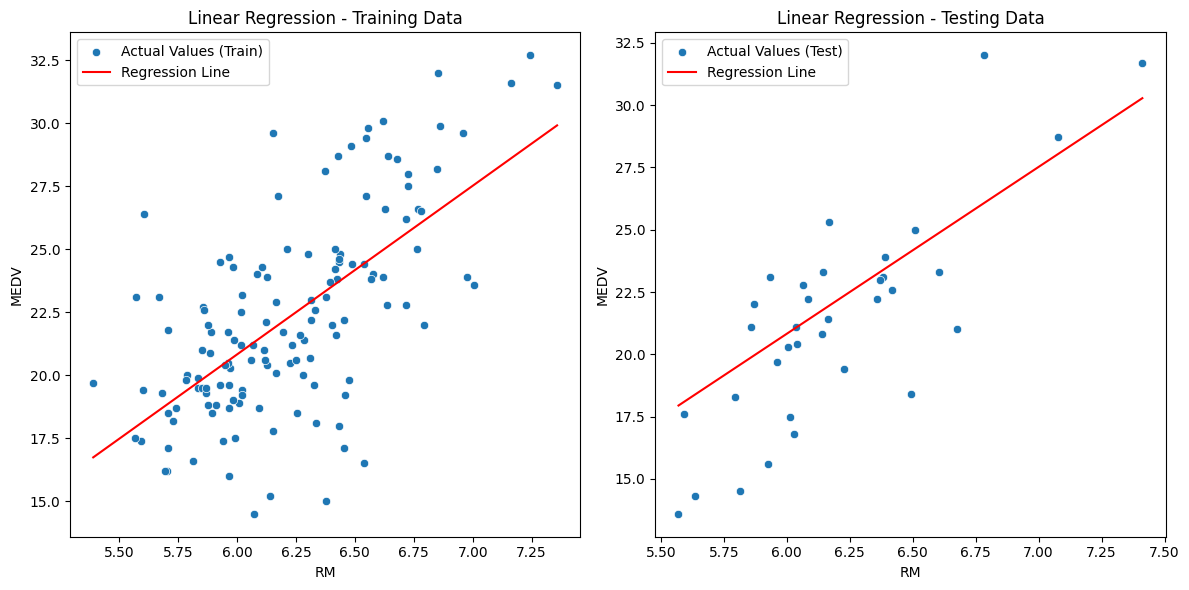

In [15]:
# Pilih fitur dan target
feature = 'RM'
target = 'MEDV'

# Membagi data menjadi data latih dan data uji
X = df[[feature]]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linear dan melatihnya
model = LinearRegression()
model.fit(X_train, y_train)

# Membuat prediksi
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# Menghitung MSE untuk data latih dan data uji
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
print(f'Mean Squared Error (Train): {mse_train}')
print(f'Mean Squared Error (Test): {mse_test}')

# Visualisasi hasil regresi linear
plt.figure(figsize=(12, 6))

# Scatter plot data latih
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_train[feature], y=y_train, label='Actual Values (Train)')
sns.lineplot(x=X_train[feature], y=y_pred_train, color='red', label='Regression Line')
plt.title('Linear Regression - Training Data')
plt.xlabel(feature)
plt.ylabel(target)
plt.legend()

# Scatter plot data uji
plt.subplot(1, 2, 2)
sns.scatterplot(x=X_test[feature], y=y_test, label='Actual Values (Test)')
sns.lineplot(x=X_test[feature], y=y_pred_test, color='red', label='Regression Line')
plt.title('Linear Regression - Testing Data')
plt.xlabel(feature)
plt.ylabel(target)
plt.legend()

plt.tight_layout()
plt.show()

Output:

Hasil Mean Squared Error (MSE) pada data pelatihan (train) dan data pengujian (test) adalah ukuran kesalahan umum yang digunakan dalam evaluasi model regresi. MSE mengukur rata-rata kuadrat perbedaan antara nilai yang diprediksi oleh model dengan nilai yang sebenarnya. Semakin rendah nilai MSE, semakin baik kinerja model.

Berikut adalah interpretasi dari hasil tersebut:

1.  Mean Squared Error (Train): 8.938567551892415
MSE pada data pelatihan adalah sekitar 8.94.
Ini berarti rata-rata kuadrat perbedaan antara nilai yang diprediksi oleh model dan nilai sebenarnya pada data pelatihan adalah sekitar 8.94.


2.   Mean Squared Error (Test): 7.370418184285883
MSE pada data pengujian adalah sekitar 7.37.
Ini berarti rata-rata kuadrat perbedaan antara nilai yang diprediksi oleh model dan nilai sebenarnya pada data pengujian adalah sekitar 7.37.
Penting untuk membandingkan MSE pada kedua set data (pelatihan dan pengujian). Jika MSE pada data pelatihan jauh lebih rendah daripada MSE pada data pengujian, itu mungkin menunjukkan overfitting, di mana model terlalu kompleks dan terlalu "menghafal" data pelatihan sehingga tidak umum di data yang belum pernah dilihat sebelumnya.







##**Evaluating**



```
# Prompt: berikan code untuk evaluasi
```



In [24]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Prediksi yang diberikan oleh model
y_true = np.array([24, 29, 20])  # Nilai sebenarnya (ground truth)
y_pred = np.array([24.617909, 29.167382, 20.068437])  # Nilai yang diprediksi oleh model

# Menghitung metrik evaluasi
mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
r2 = r2_score(y_true, y_pred)

# Menampilkan hasil evaluasi
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 0.138170629724667
Mean Absolute Error (MAE): 0.2845760000000001
R-squared (R2): 0.9898070846924426


Evaluasi model regresi linear dapat dilakukan dengan berbagai metrik. Beberapa metrik umum yang digunakan meliputi Mean Squared Error (MSE), Mean Absolute Error (MAE), dan koefisien determinasi.

Perhatikan bahwa tujuan utama adalah untuk meminimalkan MSE dan MAE, sedangkan R2 semakin mendekati 1.0 menunjukkan kinerja model yang lebih baik

In [16]:
# Hapus outliers untuk setiap kolom
columns_to_plot = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
for column in columns_to_plot:
    df = remove_outliers(df, column)

# Pilih semua fitur kecuali target 'MEDV'
X = df.drop('MEDV', axis=1)
y = df['MEDV']

# Membagi data menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat model regresi linear
model = LinearRegression()
model.fit(X_train, y_train)

# Membuat prediksi
y_pred = model.predict(X_test)

# Menghitung MSE (Mean Squared Error)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Jika Anda ingin melihat koefisien dan intercept
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)

Mean Squared Error: 3.1393077978326076
Coefficients: [ 1.21495735e+00 -2.06761454e-02 -1.44346067e-01  3.06588088e-13
 -1.15047731e+01  8.01053390e+00 -6.55909718e-02 -9.89491125e-01
  6.40040634e-01 -1.88328750e-02 -5.56376229e-01 -1.37737416e-03
  2.58577669e-01]
Intercept: -1.246040560801898


Output:



*   Mean Squared Error (MSE): 3.1393077978326076
MSE mengukur rata-rata kuadrat perbedaan antara nilai yang diprediksi oleh model dan nilai yang sebenarnya. Semakin rendah nilai MSE, semakin baik kinerja model. Dalam konteks ini, MSE adalah sekitar 3.14.

*   Coefficients: [ 1.21495735e+00, -2.06761454e-02, -1.44346067e-01, ..., 2.58577669e-01]
Koefisien menggambarkan kontribusi relatif dari setiap fitur terhadap nilai target. Dalam regresi linear, setiap fitur memiliki koefisien yang mengindikasikan seberapa besar perubahan dalam nilai target yang dapat diharapkan jika fitur tersebut berubah satu satuan, sementara fitur-fitur lainnya tetap.

*   Intercept: -1.246040560801898
Intercept (bias) adalah nilai dari variabel target ketika semua variabel independen (fitur) adalah nol. Dalam konteks ini, intercept adalah sekitar -1.25.









##**New Data Input Test**

In [17]:
# Pilih fitur dan target
feature = 'RM'
target = 'MEDV'

# Membagi data menjadi data latih dan data uji
X = df[[feature]]
y = df[target]

# Membuat dan melatih model regresi linear
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

# Contoh data baru untuk diprediksi
new_data = {'RM': [6.5, 7.2, 5.8],
            'LSTAT': [10, 5, 15]}

# Membuat DataFrame dari data baru
new_df = pd.DataFrame(new_data)

# Melakukan prediksi menggunakan model regresi linear yang telah dilatih
# Pastikan bahwa kolom pada new_df sesuai dengan fitur-fitur yang digunakan saat melatih model
columns_used_in_training = ['RM']
new_df = new_df[columns_used_in_training]

# Menampilkan hasil prediksi
predictions = model.predict(new_df)
result_df = pd.DataFrame({'RM': new_df['RM'], 'Predicted_MEDV': predictions})
print(result_df)

    RM  Predicted_MEDV
0  6.5       24.617909
1  7.2       29.167382
2  5.8       20.068437


Output:


Hasil tersebut menunjukkan hasil prediksi dari model regresi linear untuk beberapa nilai pada fitur "RM" (jumlah rata-rata kamar per hunian) terhadap variabel target "MEDV" (nilai median rumah). Mari kita bahas setiap baris hasil:


*   Baris Pertama:
Nilai "RM" yang diamati: 6.5
Nilai "Predicted_MEDV" yang diprediksi oleh model: 24.617909
*   Baris Kedua:
Nilai "RM" yang diamati: 7.2
Nilai "Predicted_MEDV" yang diprediksi oleh model: 29.167382

*   Baris Ketiga:
Nilai "RM" yang diamati: 5.8
Nilai "Predicted_MEDV" yang diprediksi oleh model: 20.068437

Dalam konteks model regresi linear, ini berarti bahwa model telah menggunakan fitur "RM" untuk memprediksi nilai target "MEDV" berdasarkan koefisien dan intercept yang telah dihitung selama pelatihan model.

Secara umum, kita dapat menginterpretasikan hasil ini sebagai berikut:

Ketika jumlah rata-rata kamar per hunian ("RM") adalah 6.5, model memperkirakan nilai median rumah ("MEDV") sekitar 24.62.
Ketika jumlah rata-rata kamar per hunian ("RM") adalah 7.2, model memperkirakan nilai median rumah ("MEDV") sekitar 29.17.
Ketika jumlah rata-rata kamar per hunian ("RM") adalah 5.8, model memperkirakan nilai median rumah ("MEDV") sekitar 20.07.
Hasil ini memberikan pemahaman tentang bagaimana model merespons variasi dalam fitur "RM" dan bagaimana itu mempengaruhi prediksi nilai target "MEDV".